# View Training Samples

Visualize predicted masks from training checkpoints.


In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Config - change if your checkpoint dir is different
CHECKPOINT_DIR = Path("../checkpoints")
SAMPLES_DIR = CHECKPOINT_DIR / "samples"


In [2]:
def load_sample(name: str):
    """Load image, predicted mask, and ground truth mask."""
    img = np.array(Image.open(SAMPLES_DIR / "images" / f"{name}.jpg"))
    pred = np.load(SAMPLES_DIR / "pred" / f"{name}.npy")
    gt = np.load(SAMPLES_DIR / "gt" / f"{name}.npy")
    return img, pred, gt

def list_samples():
    """List all available samples."""
    images_dir = SAMPLES_DIR / "images"
    if not images_dir.exists():
        return []
    return sorted([p.stem for p in images_dir.glob("*.jpg")])

def list_epochs():
    """List unique epochs that have samples."""
    samples = list_samples()
    epochs = sorted(set(s.split("_")[0] for s in samples))
    return epochs

print(f"Available epochs: {list_epochs()}")
print(f"Total samples: {len(list_samples())}")


Available epochs: ['epoch003']
Total samples: 10


In [3]:
def show_sample(name: str, threshold: float = 0.5):
    """Display sample with GT (top row) and Predicted (bottom row)."""
    img, pred, gt = load_sample(name)
    n_channels = pred.shape[0]
    
    fig, axes = plt.subplots(2, n_channels + 1, figsize=(4 * (n_channels + 1), 8))
    
    # Row 0: Ground Truth
    axes[0, 0].imshow(img)
    axes[0, 0].set_title("Image")
    axes[0, 0].axis("off")
    axes[0, 0].set_ylabel("GT", fontsize=14)
    
    for c in range(n_channels):
        axes[0, c + 1].imshow(img)
        axes[0, c + 1].imshow(gt[c] > threshold, alpha=0.5, cmap="Greens")
        axes[0, c + 1].set_title(f"GT Ch {c}")
        axes[0, c + 1].axis("off")
    
    # Row 1: Predicted
    axes[1, 0].imshow(img)
    axes[1, 0].set_title("Image")
    axes[1, 0].axis("off")
    axes[1, 0].set_ylabel("Pred", fontsize=14)
    
    for c in range(n_channels):
        axes[1, c + 1].imshow(img)
        axes[1, c + 1].imshow(pred[c] > threshold, alpha=0.5, cmap="Reds")
        axes[1, c + 1].set_title(f"Pred Ch {c} (max={pred[c].max():.2f})")
        axes[1, c + 1].axis("off")
    
    plt.suptitle(name)
    plt.tight_layout()
    plt.show()

def show_epoch(epoch: str, threshold: float = 0.5):
    """Show all samples from a specific epoch."""
    samples = [s for s in list_samples() if s.startswith(epoch)]
    print(f"Showing {len(samples)} samples from {epoch}")
    for name in samples:
        show_sample(name, threshold)


Showing 10 samples from epoch003


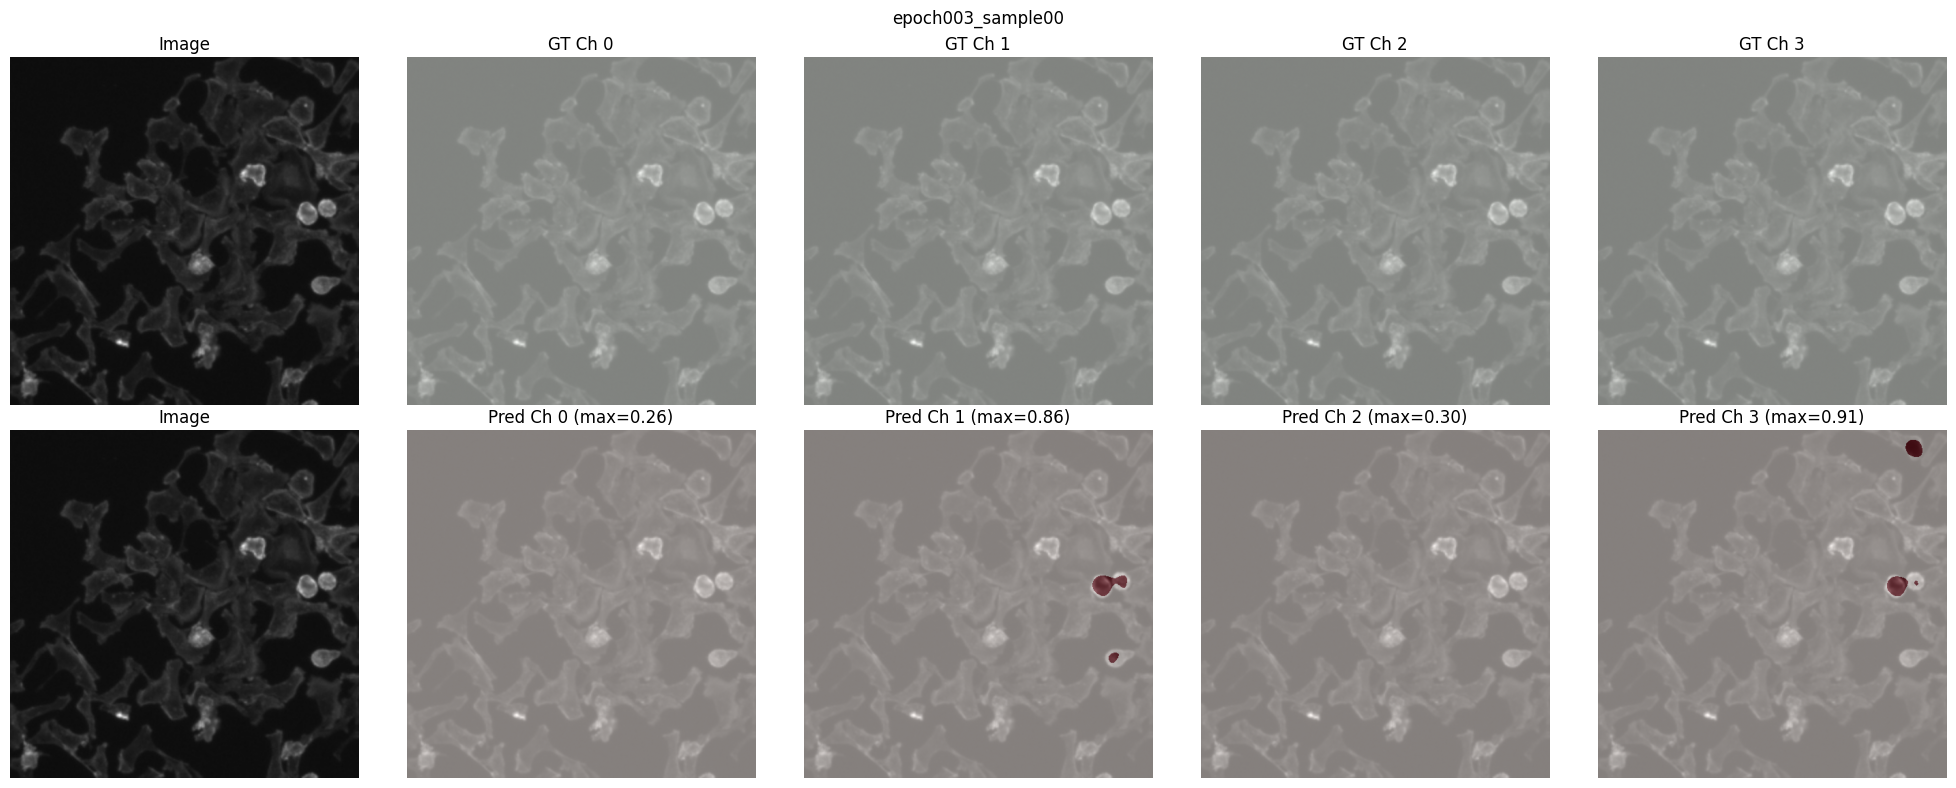

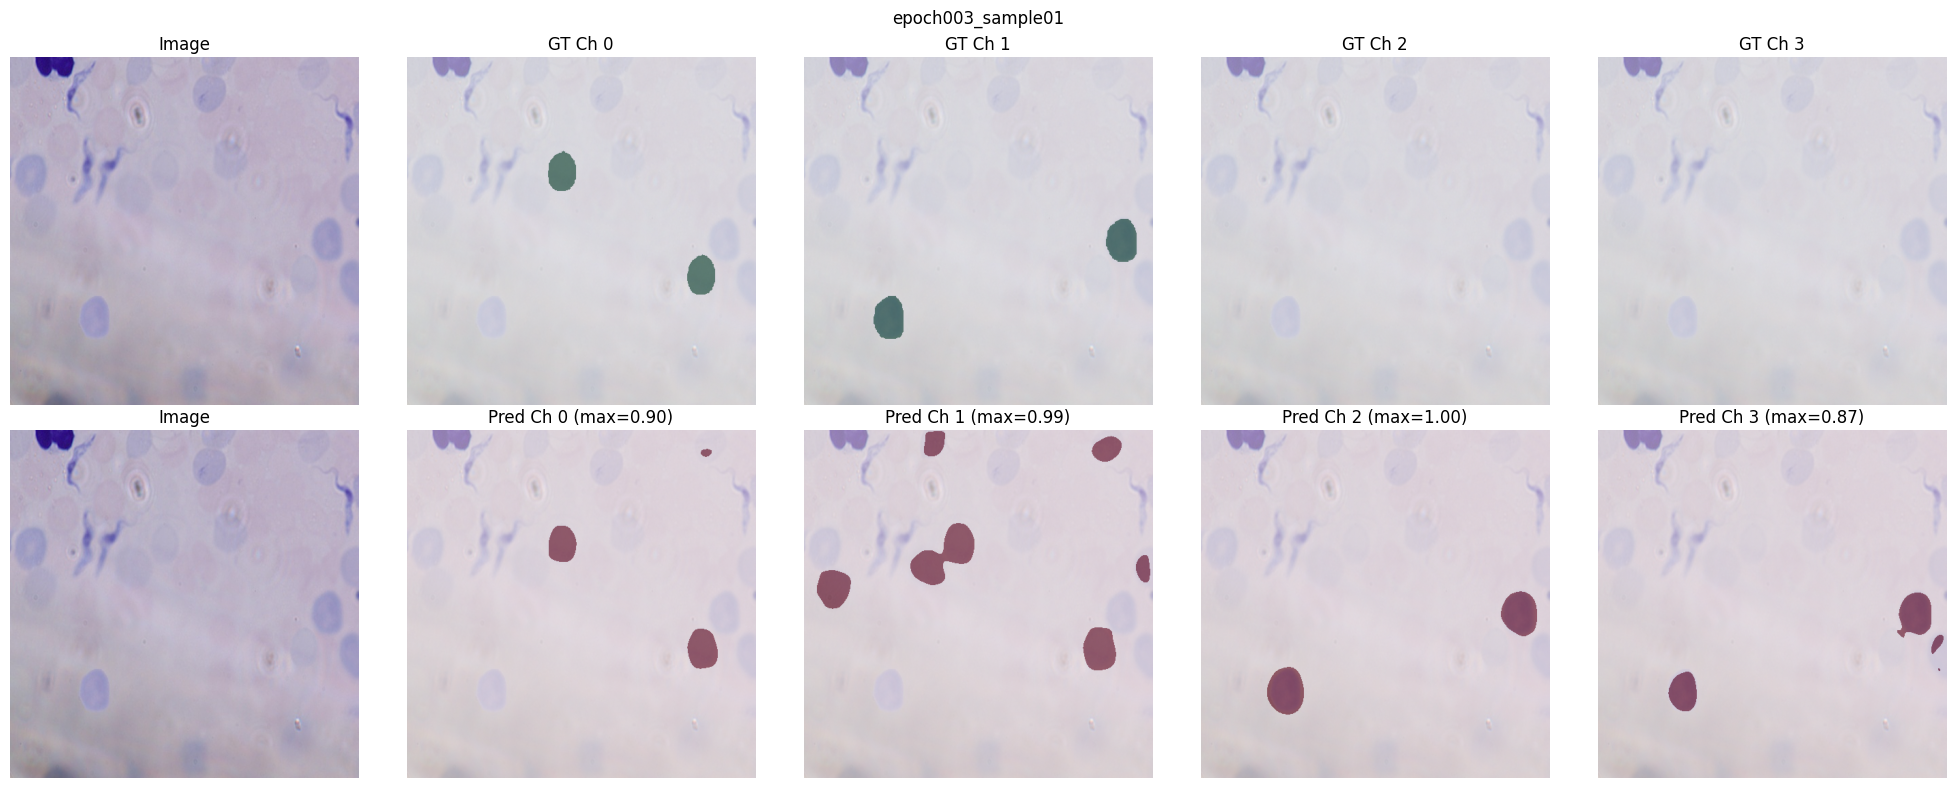

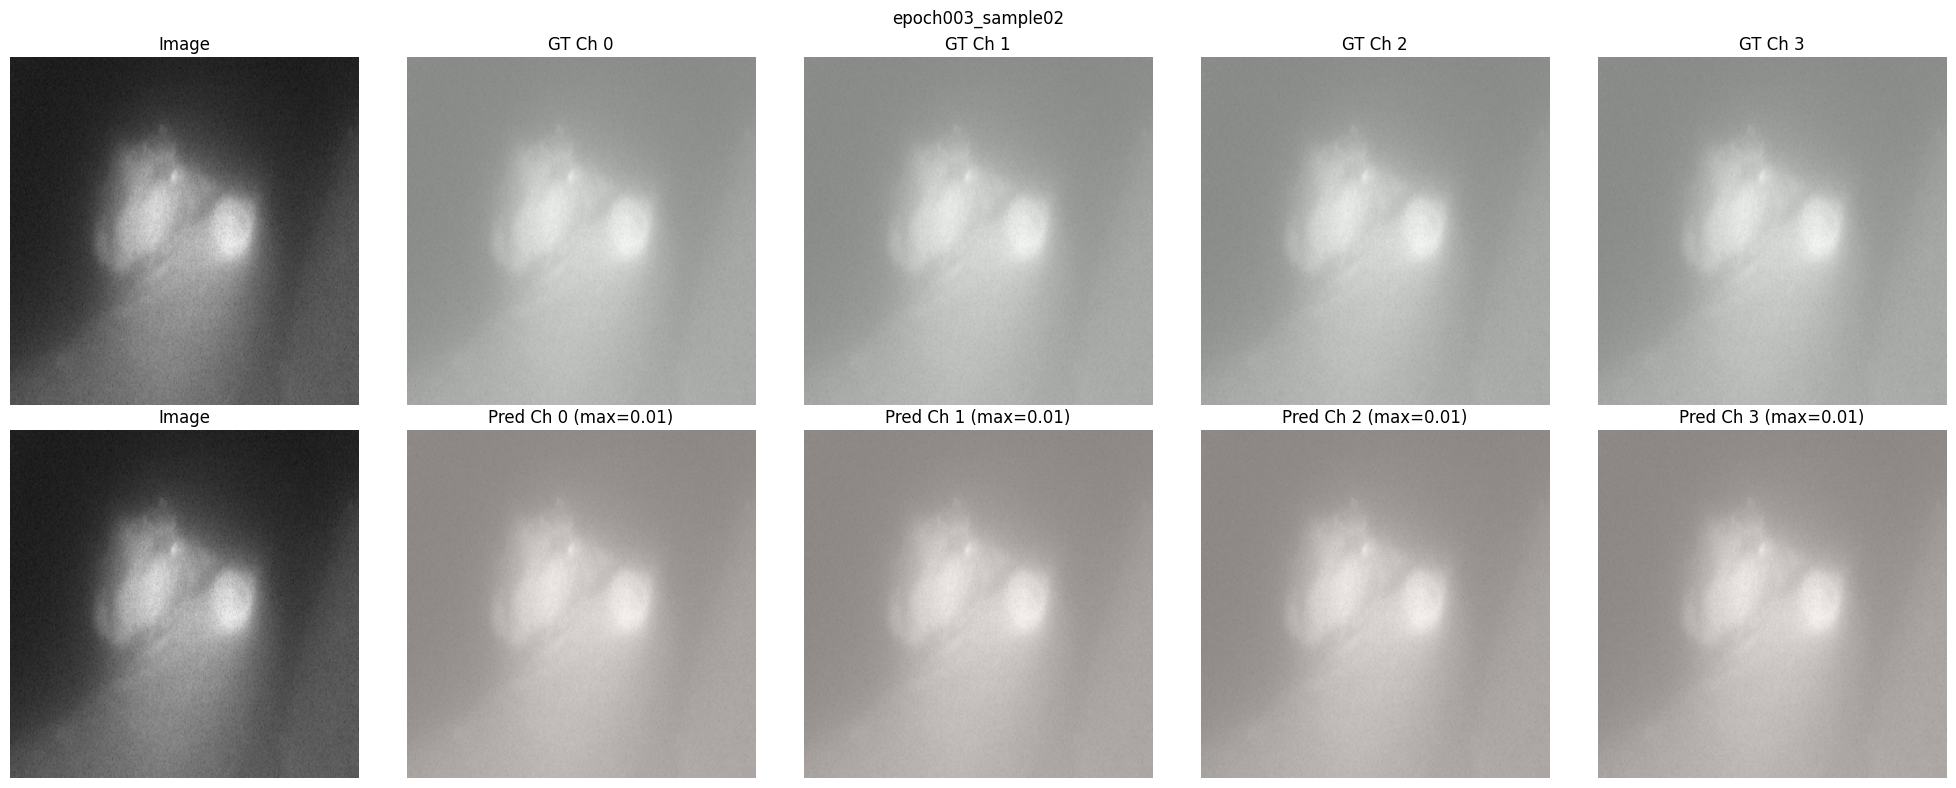

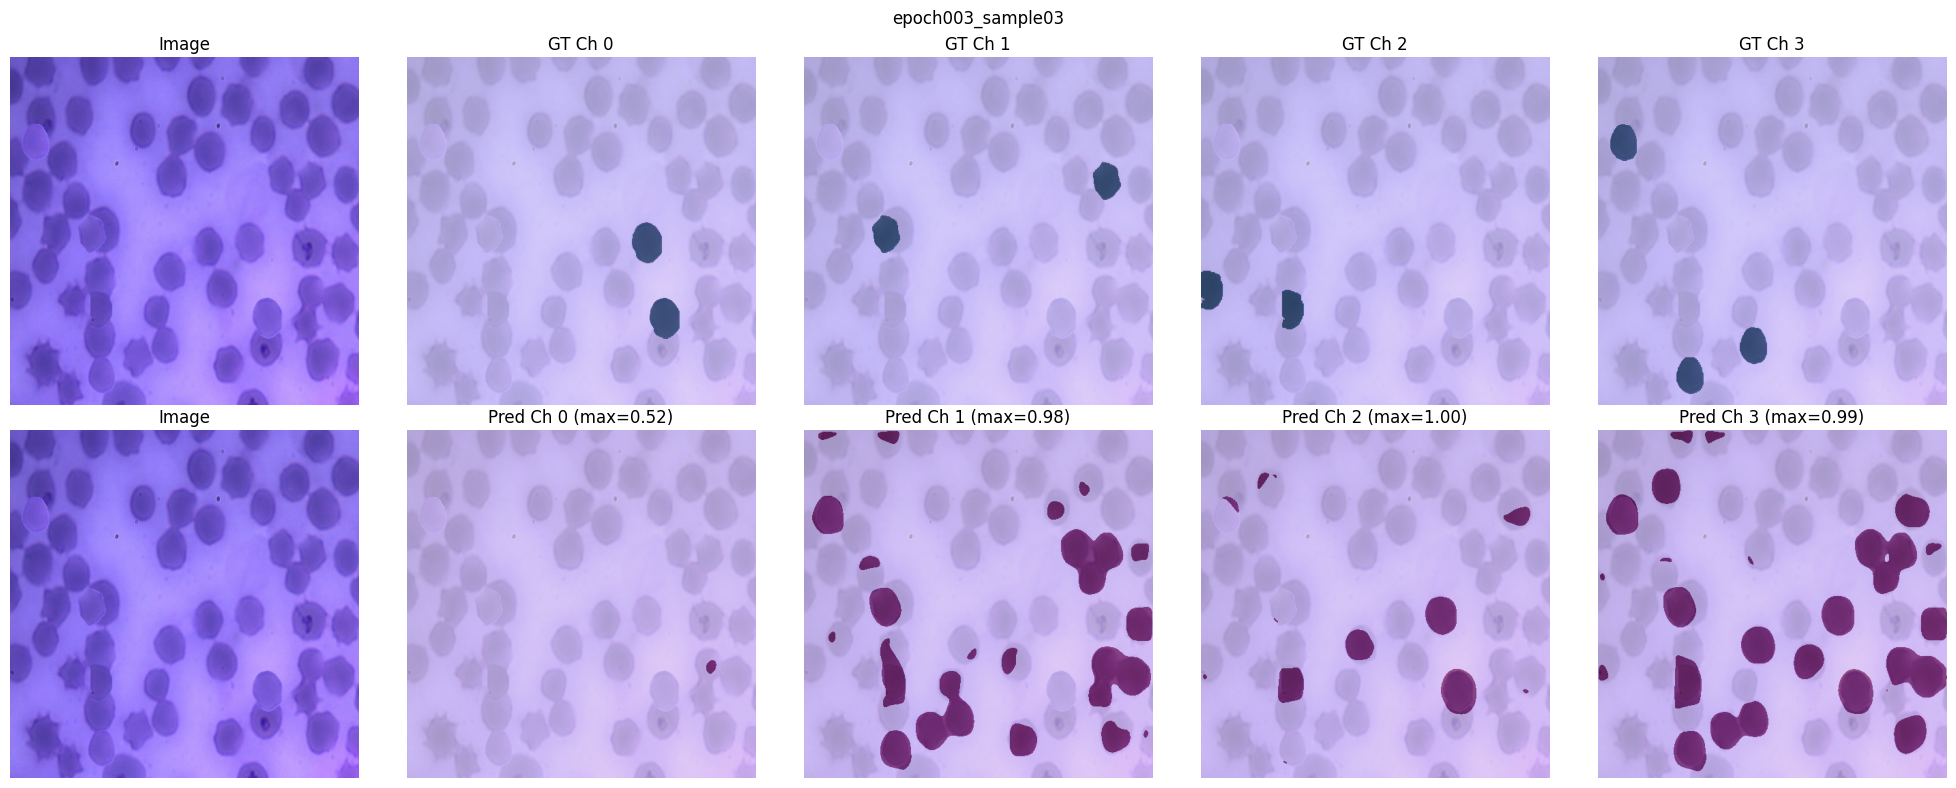

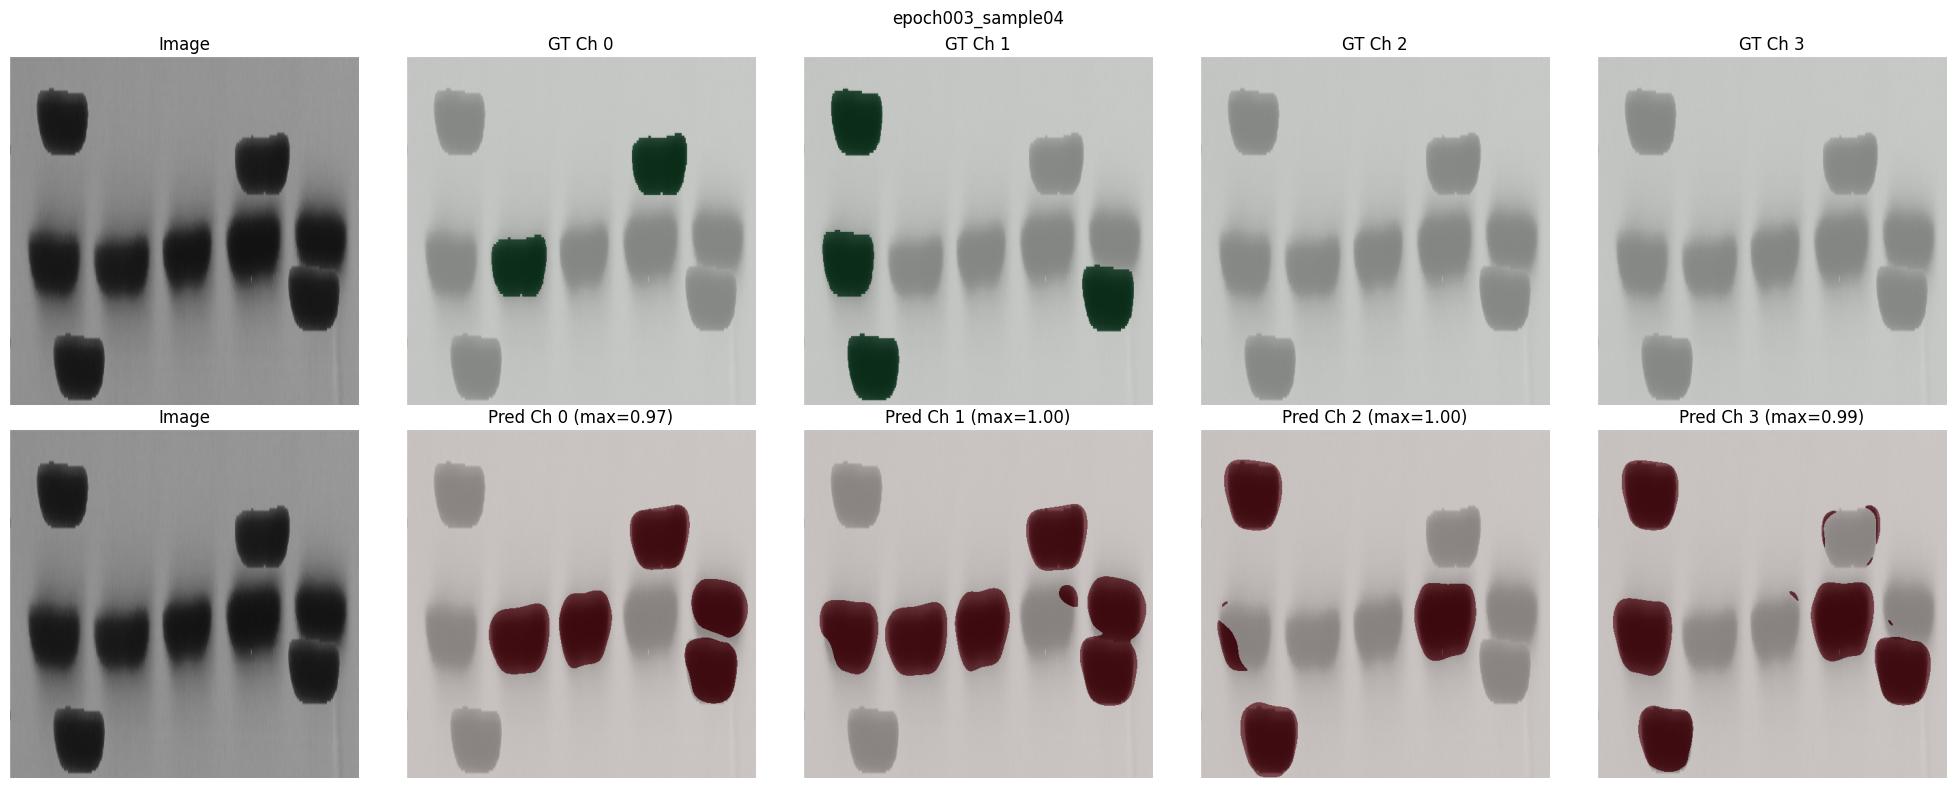

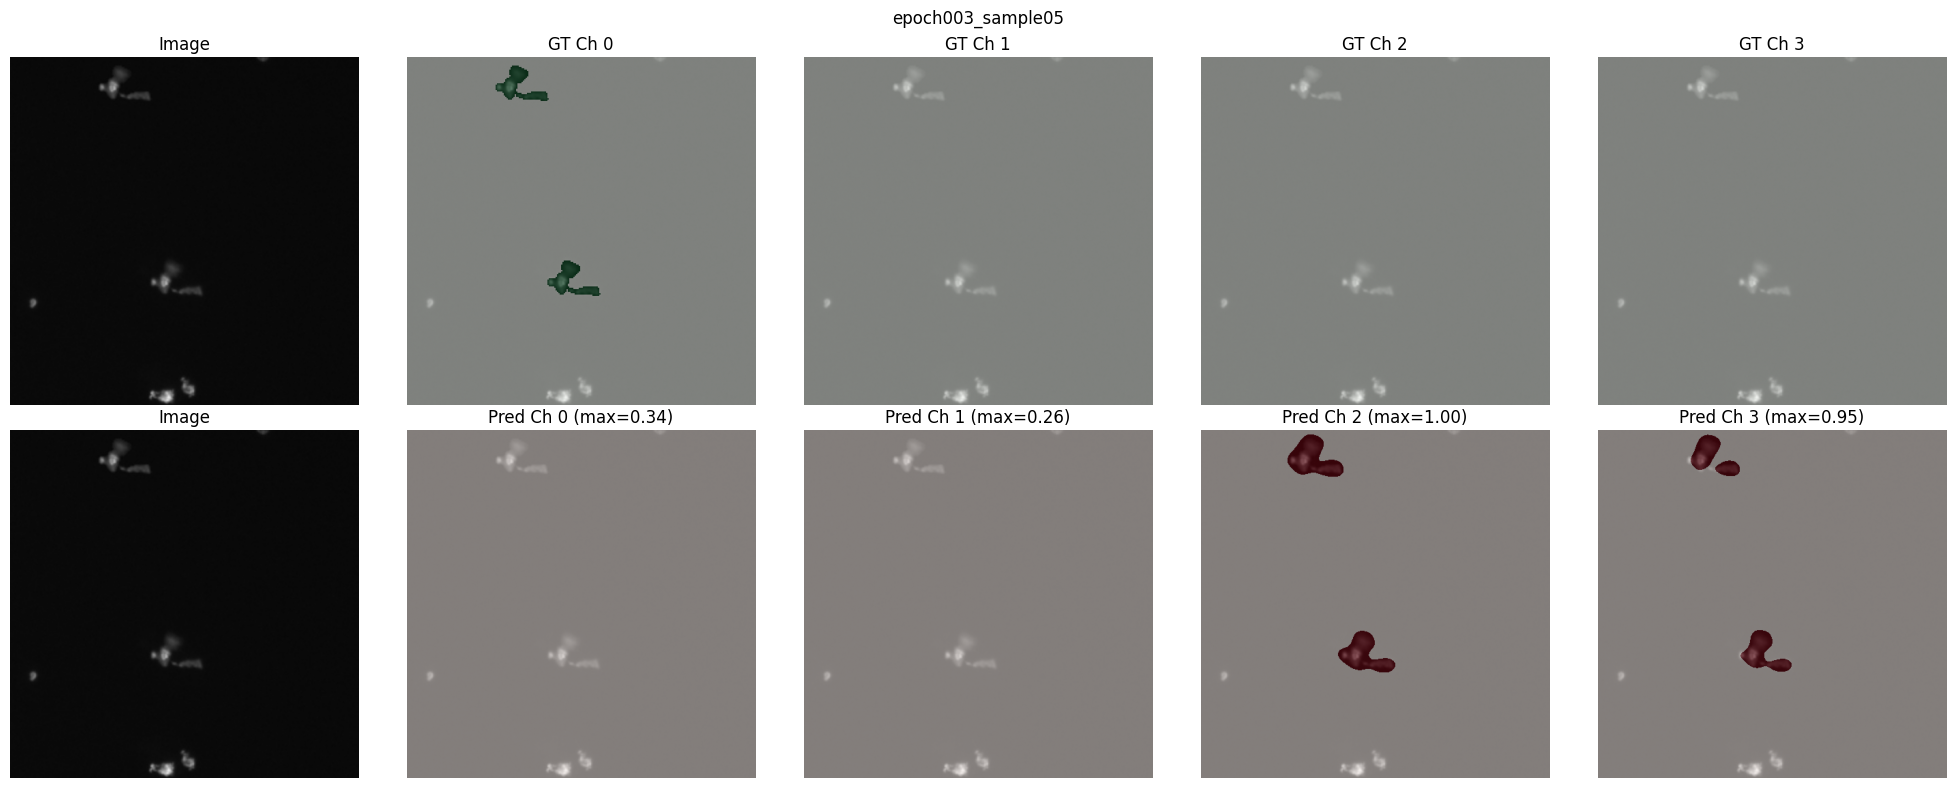

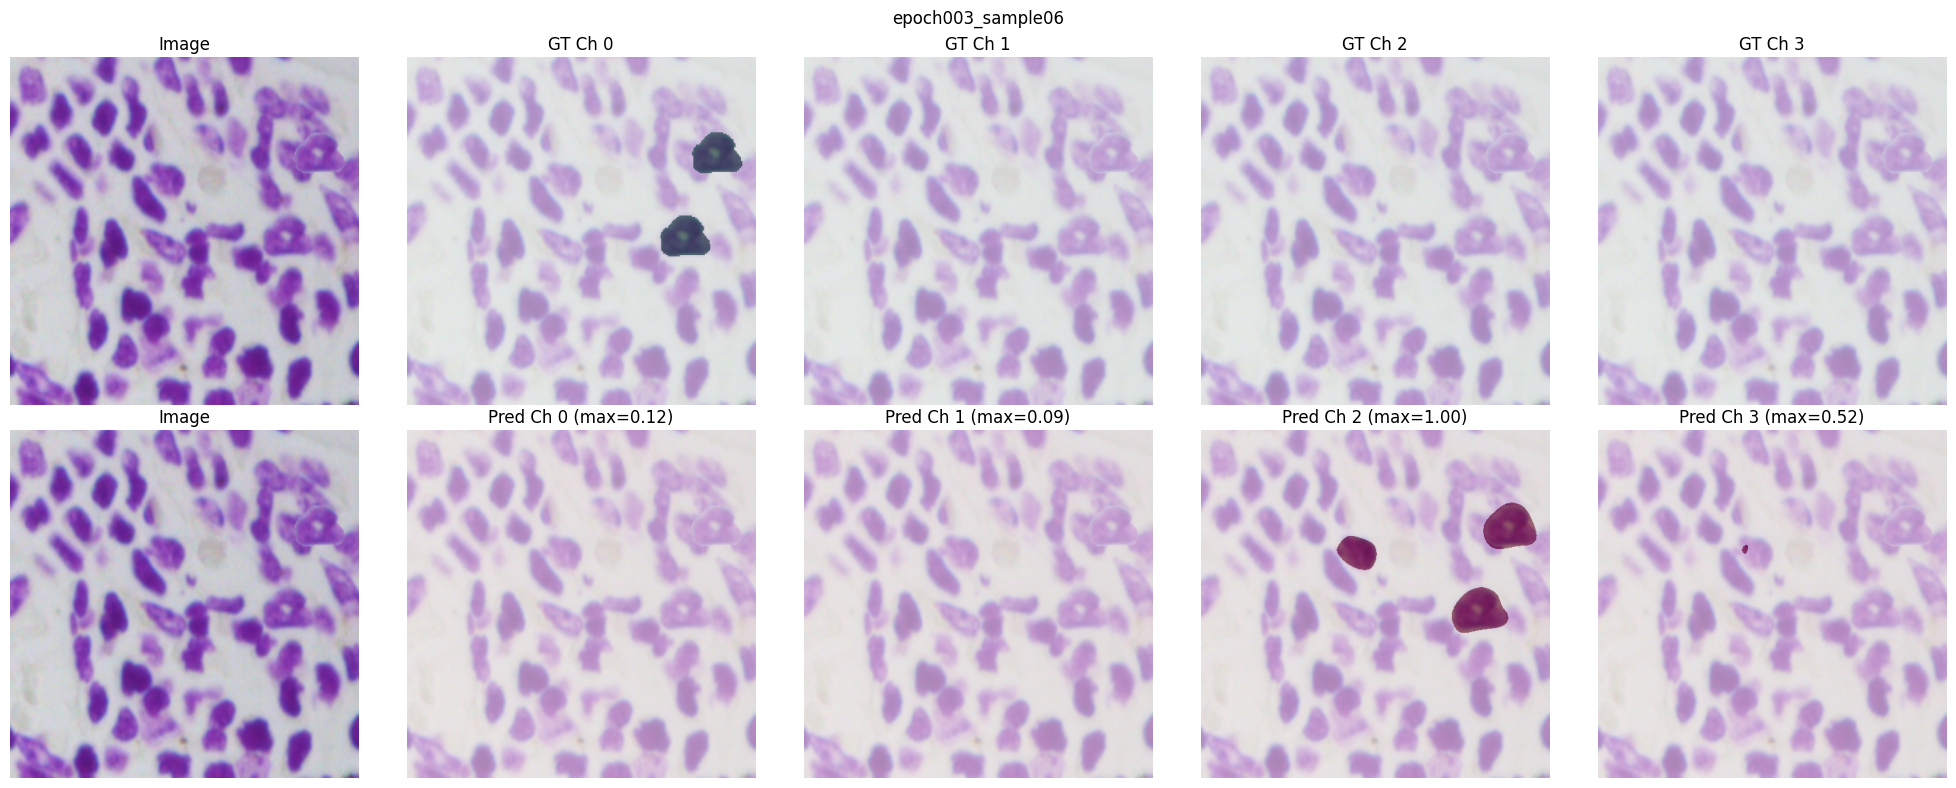

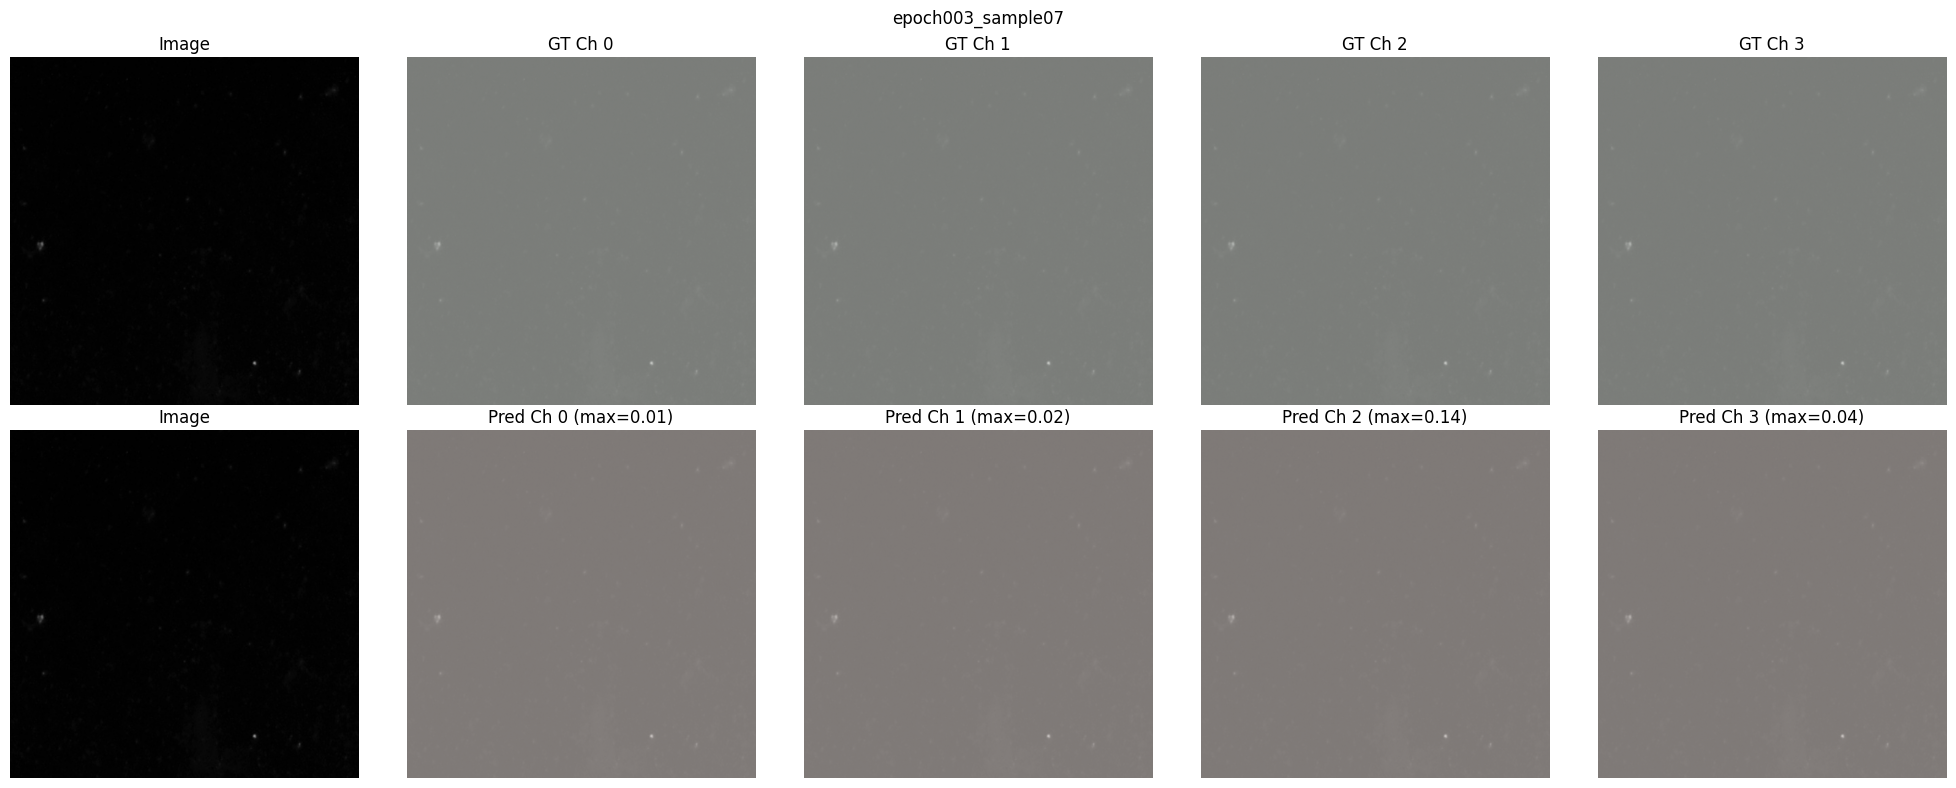

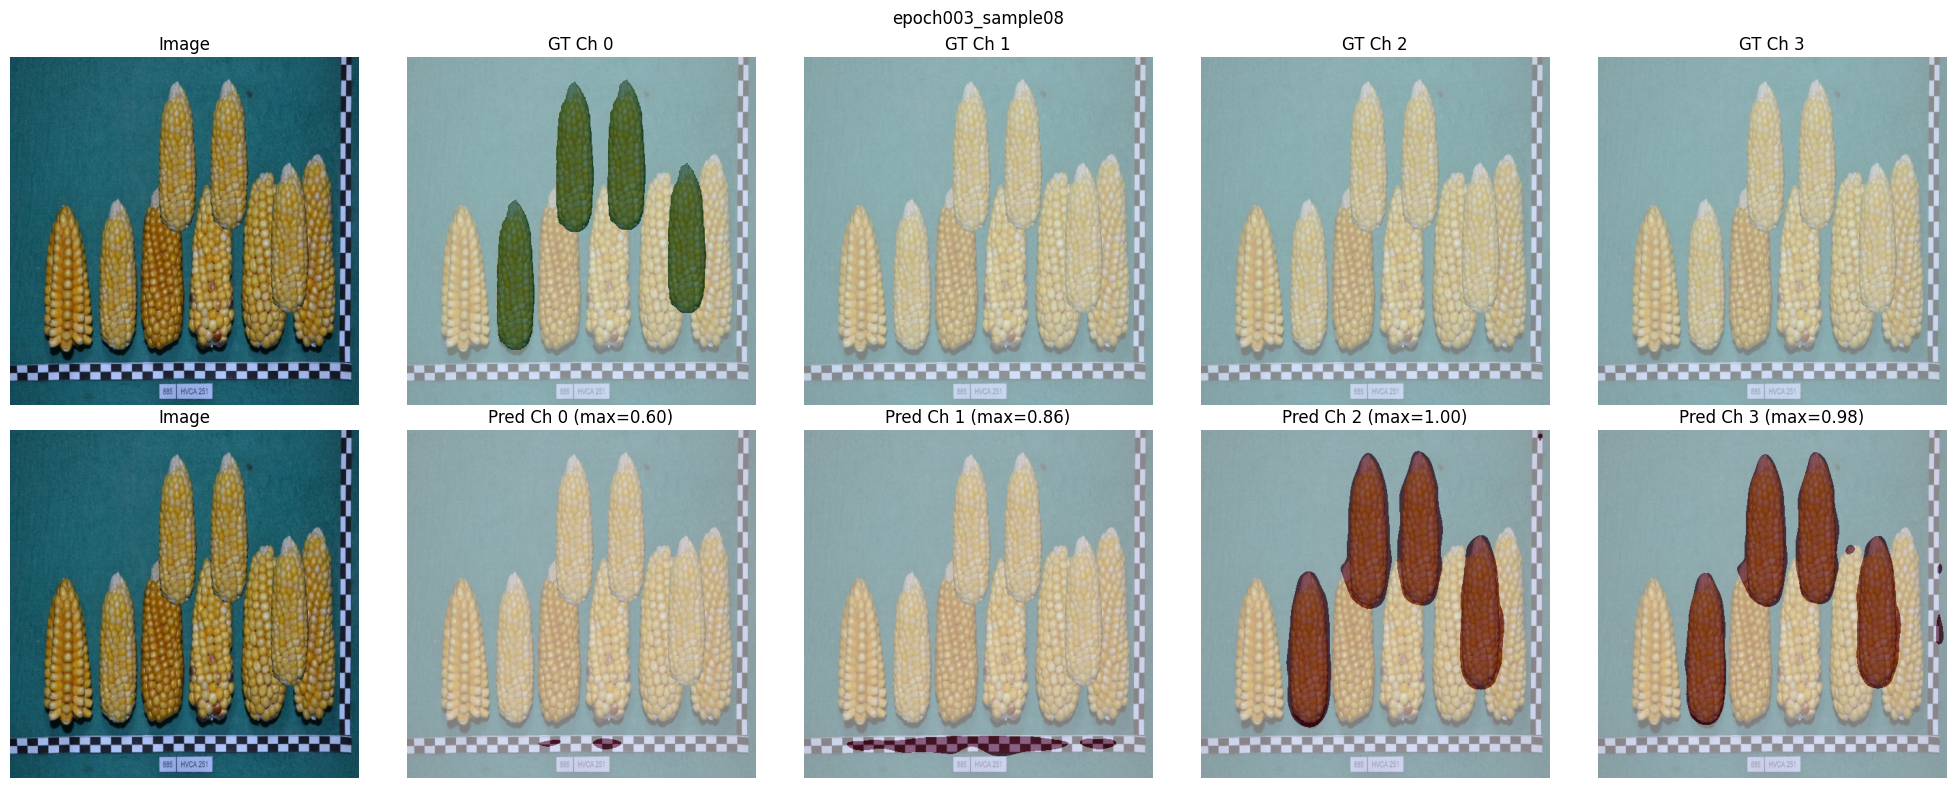

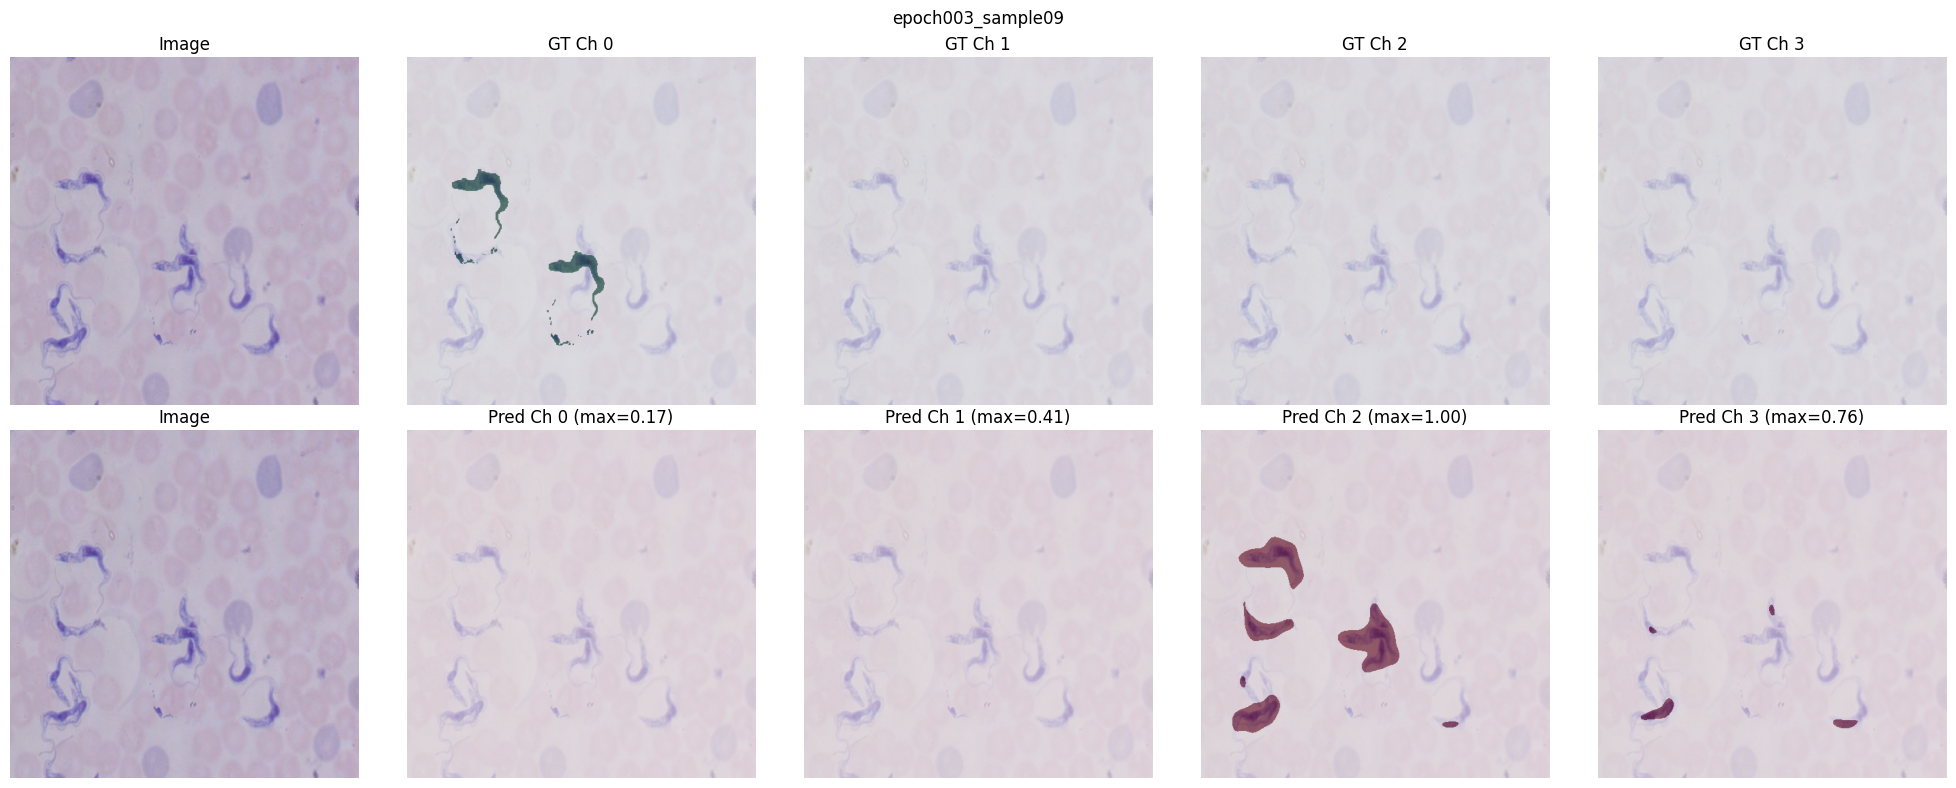

In [4]:
# Show samples from latest epoch
epochs = list_epochs()
if epochs:
    show_epoch(epochs[-1])
else:
    print("No samples found. Run training first.")


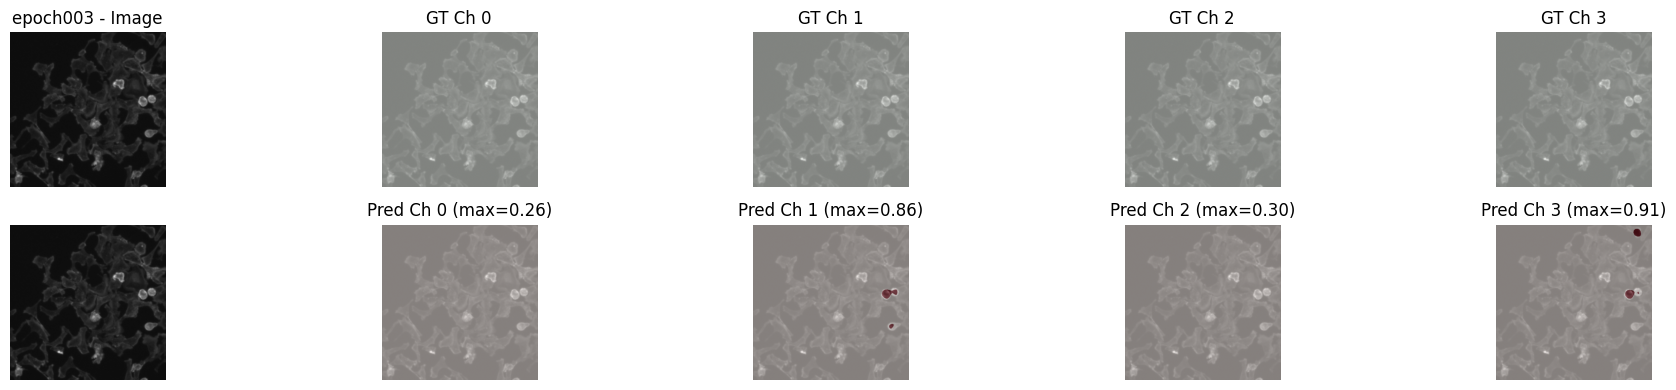

In [5]:
# Compare same sample across epochs (to see learning progress)
def compare_epochs(sample_idx: int = 0, threshold: float = 0.5):
    """Compare GT vs Predicted for same sample across epochs."""
    epochs = list_epochs()
    if not epochs:
        print("No samples found.")
        return
    
    n_epochs = len(epochs)
    # 2 rows per epoch: GT and Pred
    fig, axes = plt.subplots(n_epochs * 2, 5, figsize=(20, 4 * n_epochs))
    
    for i, epoch in enumerate(epochs):
        name = f"{epoch}_sample{sample_idx:02d}"
        try:
            img, pred, gt = load_sample(name)
        except FileNotFoundError:
            continue
        
        gt_row = i * 2
        pred_row = i * 2 + 1
        
        # GT row
        axes[gt_row, 0].imshow(img)
        axes[gt_row, 0].set_title(f"{epoch} - Image")
        axes[gt_row, 0].set_ylabel("GT", fontsize=12)
        axes[gt_row, 0].axis("off")
        
        for c in range(min(4, gt.shape[0])):
            axes[gt_row, c + 1].imshow(img)
            axes[gt_row, c + 1].imshow(gt[c] > threshold, alpha=0.5, cmap="Greens")
            axes[gt_row, c + 1].set_title(f"GT Ch {c}")
            axes[gt_row, c + 1].axis("off")
        
        # Pred row
        axes[pred_row, 0].imshow(img)
        axes[pred_row, 0].set_ylabel("Pred", fontsize=12)
        axes[pred_row, 0].axis("off")
        
        for c in range(min(4, pred.shape[0])):
            axes[pred_row, c + 1].imshow(img)
            axes[pred_row, c + 1].imshow(pred[c] > threshold, alpha=0.5, cmap="Reds")
            axes[pred_row, c + 1].set_title(f"Pred Ch {c} (max={pred[c].max():.2f})")
            axes[pred_row, c + 1].axis("off")
    
    plt.tight_layout()
    plt.show()

compare_epochs(sample_idx=0)
